<a href="https://colab.research.google.com/github/Mulenga892/Mulenga892/blob/main/bike_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import chardet

with open("SeoulBikeData.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

print(encoding)

ISO-8859-1


In [3]:
dataset_cols = ["bike_count", "hour", "temp","humidity", "wind", "visibility","dew_pt_temp", "radiation","rain" ,"snow","functional"]


In [4]:
df = pd.read_csv("SeoulBikeData.csv", encoding=encoding).drop(["Date", "Holiday","Seasons"], axis=1)

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "yes").astype(int)
df = df.drop(["hour"], axis=1)

In [12]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


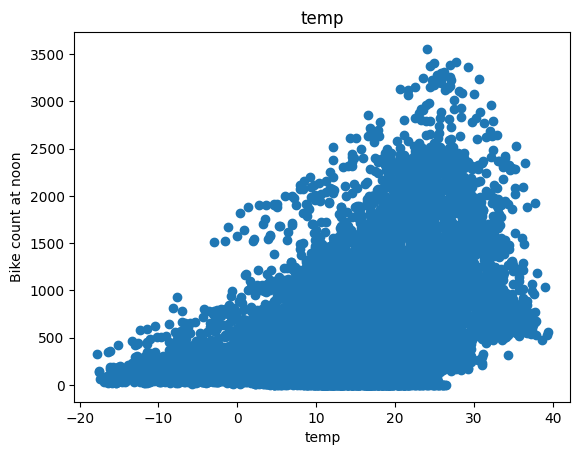

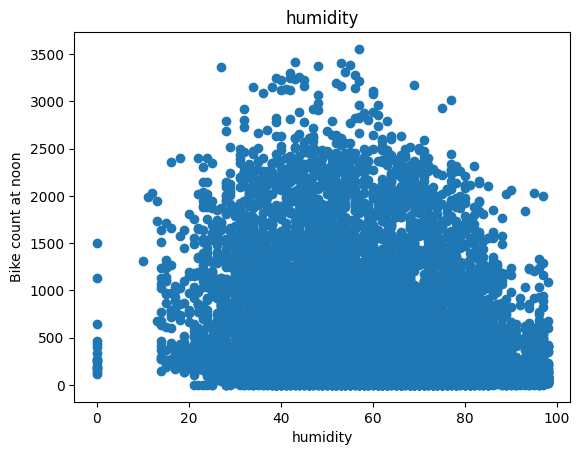

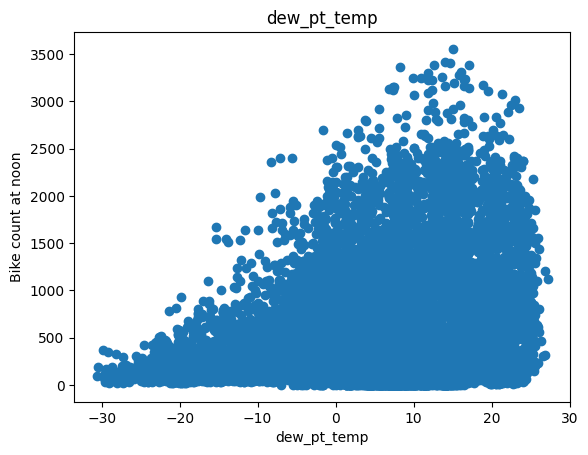

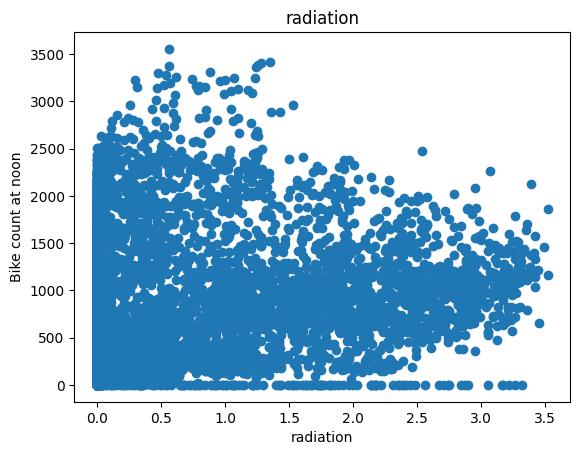

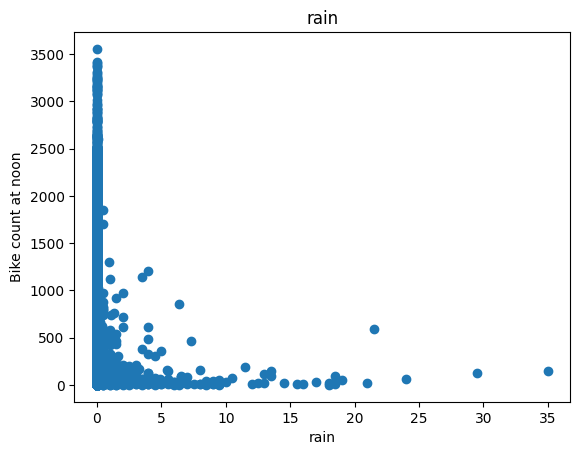

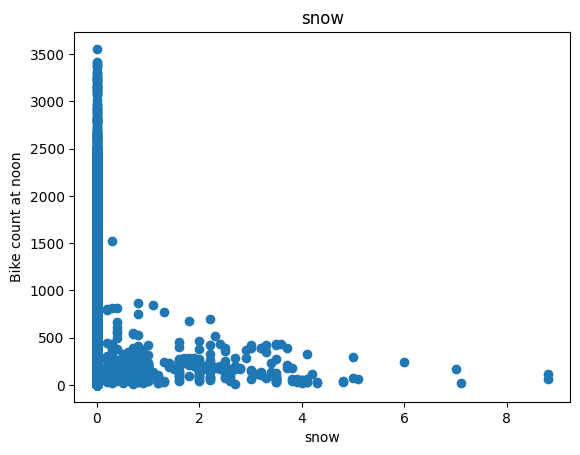

In [15]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(["functional","wind", "visibility"], axis=1)

In [14]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


#Train/valid/test

In [17]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [19]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
      if len(x_labels) == 1:
        X = dataframe[x_labels[0]].values.reshape(-1,1)
      else:
          X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y


In [20]:
_, X_train_temp, Y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, Y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, Y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [31]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, Y_train_temp)

LinearRegression()

In [34]:
temp_reg.score(X_test_temp, Y_test_temp)

0.296654723503632

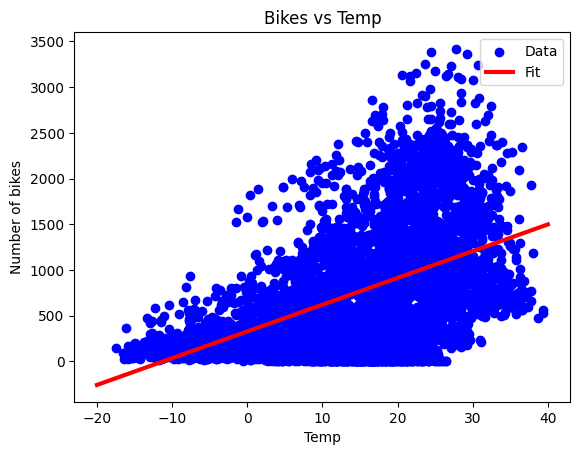

In [35]:
plt.scatter(X_train_temp, Y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()